In [103]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split


In [104]:

civs_path = 'BikeTest'


In [105]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)


21


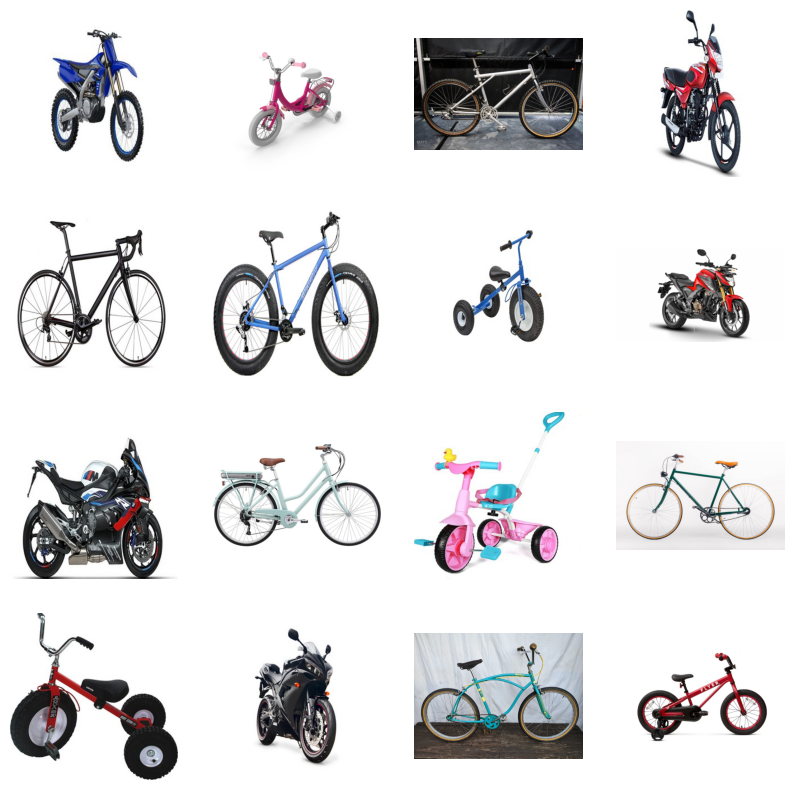

In [106]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [107]:
def label_func2(fname):
    ##print(fname)
    fname = fname.replace('BikeTest\\',"")
    ##print(fname)
    temp_name = fname.replace(".jpg", "").split("_")
    ##print(temp_name)
    
    ##y0 = temp_name[0]                             
    y1 = float(temp_name[0].replace("WH", ""))     
    y2 = float(temp_name[1].replace("SRT", ""))    
    y3 = float(temp_name[2].replace("SP", ""))     
    y4 = float(temp_name[3].replace("MD", ""))   
    y5 = float(temp_name[4].replace("SZ", ""))     

    return [fname, y1, y2, y3, y4, y5]


In [108]:

list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ##print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((39, 140))

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    ## if temp_label_vector_rc[1] == "tg":
    
        ## print(img_np.shape)
    list_imgs.append(img_np)

    list_label_vectors.append( temp_label_vector_rc )


In [109]:

X =  list_imgs
y =  list_label_vectors 


In [110]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


16
5
16
5


In [111]:

X_train[0]


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [254, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [117]:

list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
   ## target[ 4 ] = reg_vals[6]
   ## target[ 5 ] = reg_vals[7]
   ## target[ 6 ] = reg_vals[8]
   ## target[ 7 ] = reg_vals[9]
   ## target[ 8 ] = reg_vals[10]
   ## target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )


In [114]:

list_imgs_train[0]


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [254, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [118]:

list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
   ## target[ 4 ] = reg_vals[6]
   ## target[ 5 ] = reg_vals[7]
   ## target[ 6 ] = reg_vals[8]
   ## target[ 7 ] = reg_vals[9]
   ## target[ 8 ] = reg_vals[10]
   ## target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )


In [119]:

conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )


In [120]:

print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )


(16, 10)
(5, 10)



## Save data for deployment


In [121]:

DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")


In [122]:

DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")


In [125]:

list_imgs_train[15]


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [126]:

list_imgs_train[15].shape


(140, 39)

In [127]:

list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]


In [128]:

list_imgs_train_stretched[0]


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [129]:

list_imgs_train_stretched[4].shape


(5460,)

In [130]:

list_imgs_train_stretched[4][:1000]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 25

In [131]:

list_imgs_train_stretched[7].shape


(5460,)


## Keeps scale at 0..255


In [132]:

np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  


In [133]:

np_list_imgs_train_stretched.shape


(16, 5460)

In [134]:

np_list_imgs_train_stretched[3]


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [135]:

DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)


In [136]:

DF_imgs_np_train


,0,1,2,3,4,5,6,7,8,9,...,5450,5451,5452,5453,5454,5455,5456,5457,5458,5459
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,255,255,255,255
1,246,246,247,247,247,247,247,248,248,248,...,233,233,234,234,234,234,234,234,234,234
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,158,99,1,29,46,44,43,43,45,47,...,131,125,113,107,106,97,96,94,81,81
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,254
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [137]:

DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")



## Follow Web tool logic


In [138]:


url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]


In [139]:

url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]


In [140]:


url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]




## KNN part


In [141]:

def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )



In [142]:

def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((140, 39))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg


In [143]:

np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )


[[0.7  0.7  1.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.8  0.7  1.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.23 0.15 0.6  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.35 0.5  0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   1.   0.   0.   0.   0.   0.   0.  ]]


In [148]:

def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image


In [149]:

the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(15)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")


IndexError: index 15 is out of bounds for axis 0 with size 5

[7 3 4]
[[255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]
 ...
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]]
<PIL.Image.Image image mode=L size=39x140 at 0x2A069ABA090>
[7 4 3]
[[255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]
 ...
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]
 [255 255 255 ... 255 255 254]]
<PIL.Image.Image image mode=L size=39x140 at 0x2A066FB7CD0>
[14  9 11]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 254]
 ...
 [255 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=39x140 at 0x2A069DE0710>
[14 13 11]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 254]
 ...
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 255]]
<PIL.Image.Ima

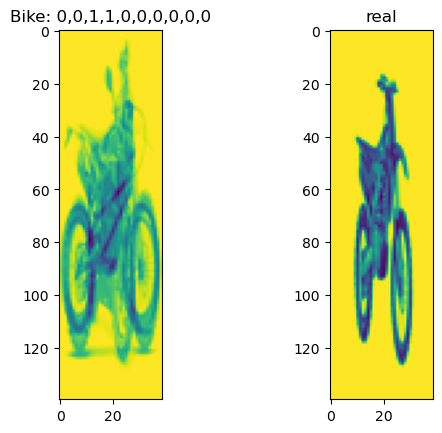

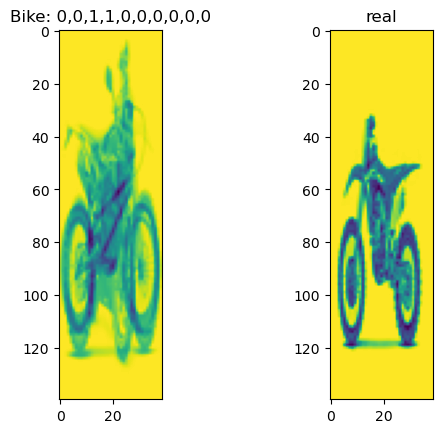

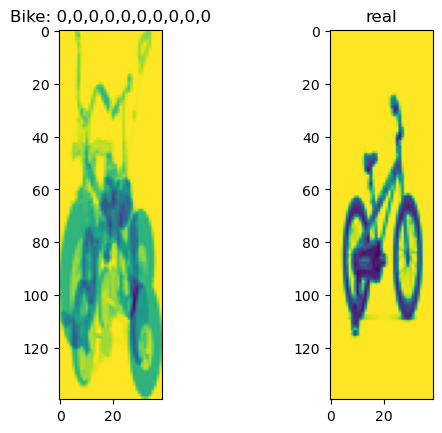

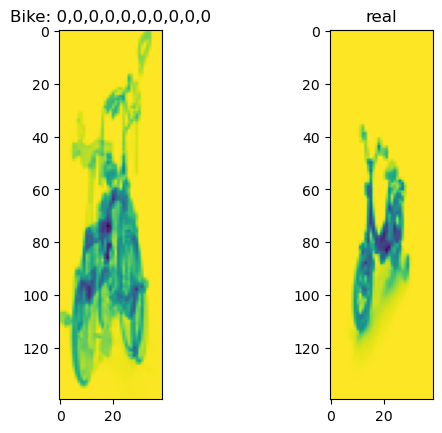

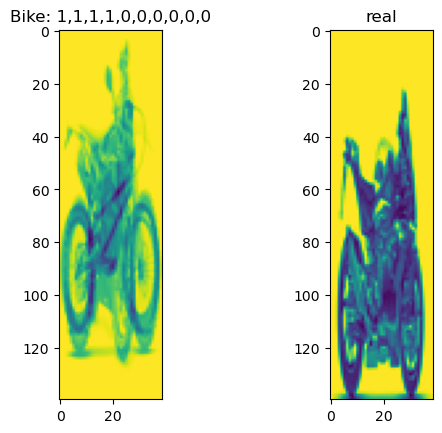

In [150]:

for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Bike: " + str_conditions)
    ax[1].set_title("real")
